In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
#

In [3]:
from pbcpy.local_functionals_utils import ThomasFermiEnergy, ThomasFermiPotential
from pbcpy.local_functionals_utils import vonWeizsackerEnergy, vonWeizsackerPotential

In [4]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

In [5]:
from pbcpy.semilocal_xc import PBE, LDA, XC, KEDF

In [6]:
from pbcpy.local_pseudopotential import NuclearElectron

In [7]:
from pbcpy.hartree import HartreeFunctional


# Read electron density from file

In [8]:
mol = PP(filepp='./PP/rho.pp').read()
rho_of_r = mol.field



# $E_{eN}$ and $v_{eN}$ but not yet $E_{NN}$

In [9]:
NuclearElectron = NuclearElectron(mol.ions,rho_of_r,["./Al_lda.oe01.recpot","./Al_lda.oe01.recpot"])

Recpot pseudopotential ./Al_lda.oe01.recpot loaded
Recpot pseudopotential ./Al_lda.oe01.recpot loaded


In [10]:
NuclearElectron.name

'Local Pseudopotential'

# $E_H$ and $v_{H}$

In [11]:

Hartree = HartreeFunctional(rho_of_r)

In [12]:
Hartree.name

'Hartree'

# $E_{xc}$ and $v_{xc}$

In [13]:

ExchangeCorrelation_LDA = LDA(rho_of_r,polarization='unpolarized')

In [14]:
ExchangeCorrelation_PBE = PBE(rho_of_r,polarization='unpolarized')



# Check against Wenhui's

In [15]:
ion_wenhui = PP("./PP/WT_KS/pot_ion.pp").read()
xc_wenhui = PP("./PP/KS/pot_xc.pp").read()
hart_wenhui = PP("./PP/KS/pot_H.pp").read()


In [16]:
v_Ts = - ion_wenhui.field - xc_wenhui.field/2 - hart_wenhui.field/2 
v_Ts= v_Ts + 5.3838/27.211396132

In [17]:
WTLDA = PP("./PP/WTLDA/pot_ke.pp").read()
WT = PP("./WT_PP/pot_ke.pp").read()
WGC = PP("./PP/WGC/pot_ke.pp").read()



# Hartree potential

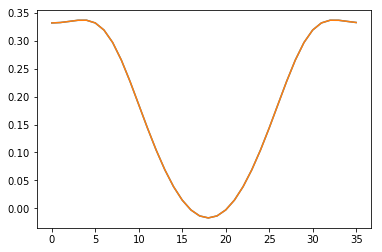

In [18]:
plt.plot(hart_wenhui.field[:,0,0,0]/2)
plt.plot(Hartree.potential[:,0,0,0])
plt.show()

# XC potential

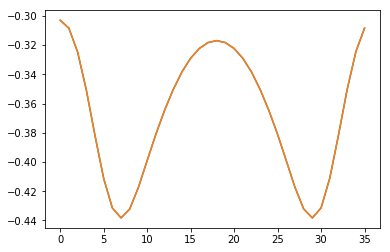

In [19]:
plt.plot(xc_wenhui.field[:,0,0,0]/2)
plt.plot(ExchangeCorrelation_LDA.potential[:,0,0,0])
plt.show()


# SCF potential

In [20]:
WT=PP('PP/WT/pot_ke.pp').read()
WT=WT.field

In [21]:
WGC=PP('PP/WGC/pot_ke.pp').read()
WGC=WGC.field

In [22]:
KS_H =PP('./PP/KS/2.84/H.pp').read()
KS_XC=PP('./PP/KS/2.84/XC.pp').read()
KS_ion=PP('./PP/KS/2.84/Vloc.pp').read()
KS=-(KS_H.field + KS_XC.field + KS_ion.field)/2.0 + 5.3838/27.211385

In [23]:
LDA=PP('PP/WTLDA/2.84/pot_ke.pp').read()
LDA=LDA.field

In [24]:
TF=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_1/pot_ke.pp').read()
TF=TF.field

In [25]:
MGP=PP('PP/MGP/pot_ke.pp').read()
MGP=MGP.field

In [26]:
TV=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_TV_scf/pot_ke.pp').read()
TV=TV.field

In [27]:
def difference(a,b):
    c = np.sqrt((a-b)**2)
    #print('# of points = ',c.grid.nnr)
    return print(c.integral()*27.211385, np.corrcoef(a.reshape(a.grid.nnr),b.reshape(a.grid.nnr))[1,0])

In [28]:
for a in [WT,WGC,LDA,TF]:
    difference(a,KS)

211.206286994 0.999947526165
82.5325378902 0.999638395106
277.018672404 0.999943299987
257.856787155 0.970318323457


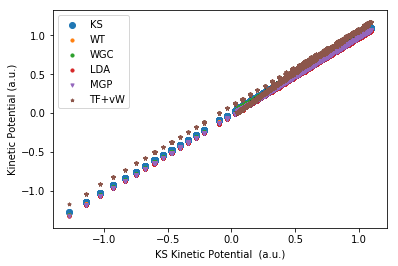

In [29]:
plt.scatter(KS,KS,label='KS')
plt.scatter(KS,WT,label='WT',s=10)
plt.scatter(KS,WGC,label='WGC',s=10)
plt.scatter(KS,LDA,label='LDA',s=10)
plt.scatter(KS,MGP,label='MGP',s=10,marker='v')
plt.scatter(KS,TV,label='TF+vW',s=10,marker='*')
plt.xlabel('KS Kinetic Potential  (a.u.)')
plt.ylabel('Kinetic Potential (a.u.)')
plt.legend()
plt.savefig('./fig/Si_CD_scf_line.eps')



In [30]:
k=[]
w=[]
c=[]
l=[]
t=[]
m=[]
for i in range(0,36):
    k.append(KS[i,i,i,0])
    w.append(WT[i,i,i,0])
    c.append(WGC[i,i,i,0])
    l.append(LDA[i,i,i,0])
    t.append(TV[i,i,i,0])
    m.append(MGP[i,i,i,0])
k = np.asarray(k,dtype=np.float)
w = np.asarray(w,dtype=np.float)
c = np.asarray(c,dtype=np.float)
l = np.asarray(l,dtype=np.float)
t = np.asarray(t,dtype=np.float)
m = np.asarray(m,dtype=np.float)

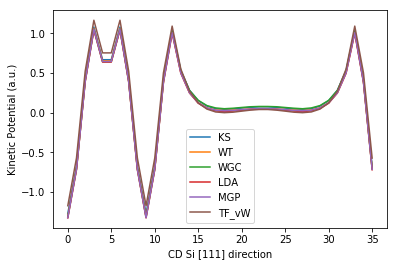

In [31]:
plt.plot(k,label='KS')
plt.plot(w,label='WT')
plt.plot(c,label='WGC')
plt.plot(l,label='LDA')
plt.plot(m,label='MGP')
plt.plot(t,label='TF_vW')
plt.ylabel('Kinetic Potential (a.u.)')
plt.xlabel('CD Si [111] direction')

#plt.plot(t,label='TF')
#plt.xlim([2,7])
#plt.ylim([-0.1,0.01])
plt.legend()
plt.savefig('./fig/KE_potential.eps')

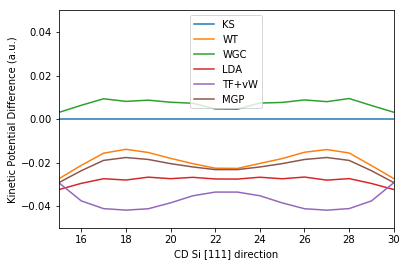

In [32]:
plt.plot(k-k,label='KS')
plt.plot(w-k,label='WT')
plt.plot(c-k,label='WGC')
plt.plot(l-k,label='LDA')
plt.plot(t-k,label='TF+vW')
plt.plot(m-k,label='MGP')
plt.ylabel('Kinetic Potential Difference (a.u.)')
plt.xlabel('CD Si [111] direction')

plt.xlim([15,30])
plt.ylim([-0.05,0.05])
plt.legend()
plt.savefig("./fig/KE_potential_diff2.eps")

In [33]:
#LC94 = KEDF(density=rho_of_r,k_str='gga_k_lc94',polarization='unpolarized')

In [34]:
#plt.plot(LC94.potential[:,0,0,0],label='LC94')
#plt.plot(WT.field[:,0,0,0],label='WT')
#plt.plot(v_Ts[:,0,0,0],label='KS')
#plt.legend()
#plt.show()

# Non-scf electron density A=2.84

In [35]:
WT= PP('./PP/WT_KS/2.84/pot_ke.pp').read()

In [36]:
WT=WT.field

In [37]:
KS_H =PP('./PP/KS/2.84/H.pp').read()
KS_XC=PP('./PP/KS/2.84/XC.pp').read()
KS_ion=PP('./PP/KS/2.84/Vloc.pp').read()

In [38]:
#WGC_r_e =PP('./PP/WGC_KS/pot_eff.pp').read()
WGC =PP('./PP/WGC_KS/pot_ke.pp').read()
WGC=WGC.field

In [39]:
#LDA_r_e = PP('./PP/WTLDA_KS/pot_eff.pp').read()
LDA  = PP('./PP/WTLDA_KS/2.84/pot_ke.pp').read()
LDA=LDA.field

In [40]:
LDA0 =PP('./PP/WTLDA0_KS/pot_ke.pp').read()
LDA0=LDA0.field

In [41]:
rho=PP('PP/KS/2.84/rho.pp').read()
rho=rho.field

In [42]:
MGP =PP('PP/MGP_KS/2.84/pot_ke.pp').read()
MGP=MGP.field

In [43]:
KGAP4 =PP('PP/KGAP_KS/pot_ke.pp').read()
KGAP1=PP('PP/KGAP_KS/2.84/1/pot_ke.pp').read()
KGAP10=PP('PP/KGAP_KS/2.84/10/pot_ke.pp').read()
KGAP4=KGAP4.field
KGAP1=KGAP1.field
KGAP10=KGAP10.field

In [44]:
KS=-(KS_H.field + KS_XC.field + KS_ion.field)/2.0 + 5.3838/27.211396132

In [45]:
k=[]
w=[]
c=[]
l=[]
l0=[]
kg1=[]
kg4=[]
kg10=[]
m=[]
for i in range(0,36):
    k.append(KS[i,i,i,0])
    w.append(WT[i,i,i,0])
    c.append(WGC[i,i,i,0])
    l.append(LDA[i,i,i,0])
    kg1.append(KGAP1[i,i,i,0])
    kg4.append(KGAP4[i,i,i,0])
    kg10.append(KGAP10[i,i,i,0])
    l0.append(LDA0[i,i,i,0])
    m.append(MGP[i,i,i,0])

In [46]:
nnr=36*36*36

In [47]:
KS=KS.reshape(nnr)
WT=WT.reshape(nnr)
WGC=WGC.reshape(nnr)
LDA=LDA.reshape(nnr)
KGAP4=KGAP4.reshape(nnr)
LDA=LDA.reshape(nnr)
LDA0=LDA0.reshape(nnr)
MGP=MGP.reshape(nnr)

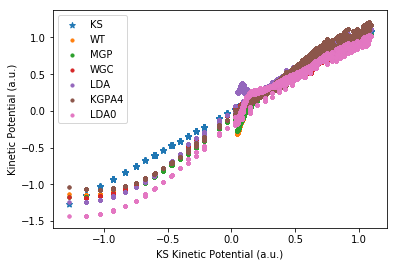

In [48]:
plt.scatter(KS,KS,label='KS',marker='*')
plt.scatter(KS,WT,label='WT',s=10)
plt.scatter(KS,MGP,label='MGP',s=10)
plt.scatter(KS,WGC,label='WGC',s=10)
plt.scatter(KS,LDA,label='LDA',s=10)
#plt.plot(kg1,label='KGAP1')
plt.scatter(KS,KGAP4,label='KGPA4',s=10)
plt.scatter(KS,LDA0,label='LDA0',s=10)
plt.xlabel('KS Kinetic Potential (a.u.)')
plt.ylabel('Kinetic Potential (a.u.)')
plt.legend()
plt.savefig('./fig/KS-KEDF_Si2.84_Nscf.eps')

In [49]:
print(1)

1


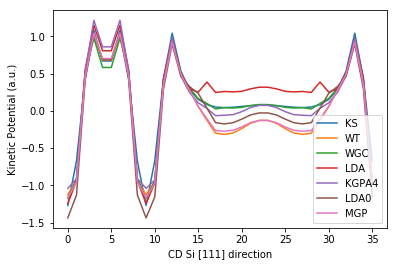

In [50]:
plt.plot(k,label='KS')
plt.plot(w,label='WT')
plt.plot(c,label='WGC')
plt.plot(l,label='LDA')
#plt.plot(kg1,label='KGAP1')
plt.plot(kg4,label='KGPA4')
plt.plot(l0,label='LDA0')
plt.plot(m,label='MGP')
plt.legend()
plt.ylabel('Kinetic Potential (a.u.)')
plt.xlabel('CD Si [111] direction')
plt.savefig('./fig/KE_potential_non.eps')

# Kinetic electron in real/reciprocal space

## Test the pbcpy and ATLAS

In [51]:
WGC_KE=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_ke.pp').read()
WGC_sys=WGC_KE
WGC_KE=WGC_KE.field
WGC_KE=WGC_KE.fft()

In [52]:
gg=WGC_sys.field.grid.get_reciprocal().gg

In [53]:
WGC_g=WGC_KE*gg 

In [54]:
WGC_g=np.abs(WGC_g)

In [55]:
WGC_r_atlas=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_KE_r.pp').read()

In [56]:
WGC_r_atlas=WGC_r_atlas.field.fft()*4.0*np.pi
WGC_r_atlas=np.abs(WGC_r_atlas)

In [57]:
g=gg**(0.5)

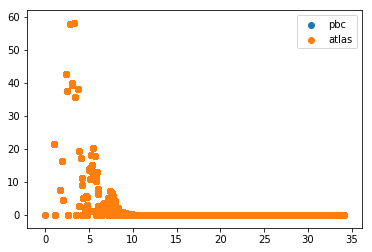

In [58]:
p1=plt.scatter(g,WGC_g)
p2=plt.scatter(g,WGC_r_atlas)
plt.legend((p1,p2),(u'pbc',u'atlas'))

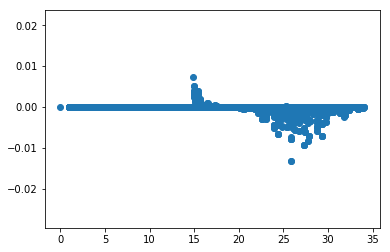

In [59]:
p2=plt.scatter(g,WGC_r_atlas-WGC_g)

# Anylysis the KS/OF-DFT results

In [60]:
KS_KE_g=KS.fft()
KS_KE_g= KS_KE_g *gg
KS_KE_g=np.abs(KS_KE_g)

IndexError: too many indices for array

In [ ]:
def rho_KE(pot):
    rho_KE = pot.field.fft()
    gg= pot.field.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.abs(rho_KE)
    return rho_KE   

In [ ]:
WT_r =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WT/pot_ke.pp').read()
WGC_r =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_ke.pp').read()
KGAP_r=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_Kgap//pot_ke.pp').read()
LDA_r=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_LDA//pot_ke.pp').read()

In [ ]:
WGC_KE_g=rho_KE(WGC_r)
WT_KE_g=rho_KE(WT_r)
KGAP_KE_g=rho_KE(KGAP_r)
LDA_KE_g=rho_KE(LDA_r)

In [ ]:
p1=plt.scatter(g,KS_KE_g,alpha=0.9,marker='x',s=14.0)
#p2=plt.scatter(g,WT_KE_g,s=12.0)
#p3=plt.scatter(g,WGC_KE_g,s=12.0)
#p4=plt.scatter(g,KGAP_KE_g,s=12.0)
#p5=plt.scatter(g,LDA_KE_g,s=12.0)

plt.xlim([0,15])
#plt.legend((),(u'KS',u'WT',u'WGC',u'KGAP',u'LDA'))


# SC Silicon

In [ ]:
125.207657547356**(1.0/3.0)

In [ ]:
5.002767235497082*0.529177208607388

### Fermi energy =7.4126 eV

In [ ]:
H=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_H.pp').read()
H=H.field

In [ ]:
XC=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_XC.pp').read()
XC=XC.field

In [ ]:
Loc=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_ion.pp').read()
Loc=Loc.field

In [ ]:
KS_SC=-0.5*(H + XC + Loc) + 7.4126/27.211396132

In [ ]:
gg=H.grid.get_reciprocal().gg
KS_SC_g = KS_SC.fft()
KS_SC_r = (KS_SC_g*gg).ifft()
KS_SC_g = np.abs(KS_SC_g * gg)
g=gg**0.5

In [ ]:
def rho_KE(pot):
    rho_KE = pot.field.fft()
    gg= pot.field.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE 

In [ ]:
WGC =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WGC/pot_ke.pp').read()
WT =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WT/pot_ke.pp').read()
LDA= PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_LDA/pot_ke.pp').read()
KGAP = PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_Kgap/pot_ke.pp').read()

In [ ]:
WGC_g=rho_KE(WGC)
WT_g=rho_KE(WT)
LDA_g=rho_KE(LDA)
KGAP_g=rho_KE(KGAP)

In [ ]:
for i in range(len(WGC.ions)):
    WGC.ions[i].strf

In [ ]:
WGC=WGC.field
WT=WT.field
LDA=LDA.field
KGAP=KGAP.field

In [ ]:
k=[]
w=[]
c=[]
l=[]
kg=[]
kr=[]
for i in range(0,24):
    k.append(KS_SC[i,i,i,0])
    w.append(WT[i,i,i,0])
    c.append(WGC[i,i,i,0])
    l.append(LDA[i,i,i,0])
    kg.append(KGAP[i,i,i,0])
    kr.append(KS_SC_r[i,i,i,0])
k = np.asarray(k,dtype=np.float)
w = np.asarray(w,dtype=np.float)
c = np.asarray(c,dtype=np.float)
l = np.asarray(l,dtype=np.float)
kg = np.asarray(kg,dtype=np.float)
kr =np.asanyarray(kr,dtype=np.float)

In [ ]:
plt.plot(k,label='KS')
plt.plot(w,label='WT')
plt.plot(c,label='WGC')
plt.plot(l,label='LDA')
plt.plot(kg,label='Kgap')
plt.ylabel('Kinetic Potential (a.u.)')
plt.legend()
plt.savefig('./fig/KE_SC_Si.eps')

In [ ]:
plt.plot(kr,label='KR')
plt.ylabel('Effective Electron Density (a.u.)')

In [ ]:
g.shape

In [ ]:
p1=plt.scatter(g,KS_SC_g,alpha=1.0,marker='o',s=14.0)
p2=plt.scatter(g,WGC_g,s=12.0)
p3=plt.scatter(g,WT_g,s=12.0)
p4=plt.scatter(g,LDA_g,s=12.0)

plt.xlim([0,18])
plt.legend((p1,p2,p3,p4),(u'KS',u'WGC',u'WT',u'LDA'))

#  Atom in the centern of cubic box

## Fermi enenrgy= 7.4126

In [ ]:
def rho_KE(pot):
    rho_KE = pot.fft()
    gg= pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.abs(rho_KE)
    return rho_KE 

In [ ]:
def rho_KE_r(pot,sigma=0.0):
    rho_KE = pot.fft()
    gg = pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg*np.exp(-gg*sigma**2/4.0)
    rho_KE_r=rho_KE.ifft()
    return rho_KE_r

In [ ]:
H_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_H.pp').read()
H_c=H_c.field

In [ ]:
XC_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_XC.pp').read()
XC_c=XC_c.field

In [ ]:
Loc_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_ion.pp').read()
Loc_c=Loc_c.field

In [ ]:
WT_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WT_c/pot_ke.pp').read()
WT_c=WT_c.field

In [ ]:
WGC_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WGC_c/pot_ke.pp').read()
WGC_c=WGC_c.field

In [ ]:
KS_SC_c=-0.5*(H_c + XC_c + Loc_c) + 7.4126/27.211396132

In [ ]:
#gg=H_c.grid.get_reciprocal().gg
#KS_SC_c_g = KS_SC_c.fft()
#KS_SC_c_g = np.abs(KS_SC_c_g * gg)
#g=gg**0.5

In [ ]:
KS_SC_c_g=rho_KE(KS_SC_c)
KS_SC_r=rho_KE_r(KS_SC_c)
H_g=rho_KE(H_c)
H_r=rho_KE_r(H_c)
XC_g=rho_KE(XC_c)
XC_r=rho_KE_r(XC_c)
Loc_g=rho_KE(Loc_c)
Loc_r=rho_KE_r(Loc_c)
Loc_r_numcheck = rho_KE_r(Loc_c,sigma=0.25)
WGC_r=rho_KE_r(WGC_c)
WGC_g=rho_KE(WGC_c)
WT_r=rho_KE_r(WT_c)
WT_g=rho_KE(WT_c)

In [ ]:
Loc_r.integral()

In [ ]:
p1=plt.scatter(g,KS_SC_g,marker='v',s=18.0,alpha=1.0)
p2=plt.scatter(g,KS_SC_c_g,marker='o',s=12.0,alpha=0.5)

In [ ]:
p1=plt.scatter(g,KS_SC_g,marker='v',s=18.0,alpha=1.0)
p2=plt.scatter(g,KS_SC_c_g,marker='o',s=12.0,alpha=0.5)
p3=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
p5=plt.scatter(g,XC_g,marker='o',s=12.0,alpha=1.0)
p6=plt.scatter(g,Loc_g,marker='o',s=12.0,alpha=1.0)
plt.legend((p1,p2,p3,p5,p6),(u'KS',u'KS2',u'H',u'XC',u'Loc'))

In [ ]:
#p3=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
p5=plt.scatter(g,XC_g,marker='v',s=19.0,alpha=1.0)
#p6=plt.scatter(g,Loc_g,marker='o',s=12.0,alpha=1.0)
#plt.legend((p3,p5),(u'H',u'XC'))

In [ ]:
nnr=24
h=np.arange(nnr,dtype='float')
xc=np.arange(nnr,dtype='float')
ion=np.arange(nnr,dtype='float')
ks=np.arange(nnr,dtype='float')
wt=np.arange(nnr,dtype='float')
wgc=np.arange(nnr,dtype='float')
for i in range(0,24):
    h[i]=H_r[i,i,i,0]
    xc[i]=XC_r[i,i,i,0]
    ion[i]=Loc_r[i,i,i,0]
    ks[i]=KS_SC_r[i,i,i,0]
    wt[i]=WT_r[i,i,i,0]
    wgc[i]=WGC_r[i,i,i,0]

In [ ]:
plt.plot(ks,label='KS')
plt.plot(h,label='H')
plt.plot(xc,label='XC')
plt.plot(ion,label='Loc')
plt.plot(wt,label='WT')
plt.plot(wgc,label='WGC')

#plt.ylim([-5,5])
plt.legend()

In [ ]:
plt.plot(ks,label='KS')
plt.plot(wt,label='WT')
plt.plot(wgc,label='WGC')
plt.legend()

In [ ]:
plt.plot(xc,label='XC')
plt.plot(h,label='H')
plt.legend()

In [ ]:
rho=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/rho.pp').read()
rho=rho.field.fft()
rho=np.abs(rho)

In [ ]:
p1=plt.scatter(g,rho,marker='o',s=18.0,alpha=1.0)
plt.xlim([0,4])

In [ ]:
g.shape

In [ ]:
KS_SC_c_g.shape

In [ ]:
KS_SC_g.shape

In [ ]:
MGP=MGP.field


In [ ]:
nnr=36*36*36
KS=KS.reshape(nnr)
WT=WT.reshape(nnr)
WGC=WGC.reshape(nnr)
LDA=LDA.reshape(nnr)
LDA0=LDA0.reshape(nnr)
rho=rho.reshape(nnr)

In [ ]:
MGP=MGP.reshape(nnr)
KGAP=KGAP.reshape(nnr)
KGAP1=KGAP1.reshape(nnr)
KGAP10=KGAP10.reshape(nnr)

In [ ]:
p1=plt.scatter(KS,KS)
p2 =plt.scatter(KS,WT)
p3 =plt.scatter(KS,WGC)
p4 =plt.scatter(KS,LDA)
p5= plt.scatter(KS,KGAP1)
p6= plt.scatter(KS,KGAP10)
p7=plt.scatter(KS,KGAP)
plt.legend((p1,p2,p3,p4,p5,p6,p7),(u'KS',u'WT',u'KGAP1',u'KGAP4'))

In [ ]:
p1=plt.scatter(rho,KS)
p2 =plt.scatter(rho,WT)
p3 =plt.scatter(rho,WGC)
p4= plt.scatter(rho,rho*20)
p5 =plt.scatter(rho,KGAP)
plt.legend((p1,p2,p3,p4,p5),(u'KS',u'WT',u'WGC',u'rho',u'KGAP'))

In [ ]:
df = pd.DataFrame({'KS':KS,
     'WT':WT,
     'WTLDA':WTLDA,
     'WGC':WGC,
      'WTLDA0':WTLDA,
      'KGAP':KGAP,
       'KGAP1':KGAP1,
        'KGAP10':KGAP10}
                 )

In [ ]:
df.corr()

In [ ]:
#plt.plot(WT_EFF[:,18,0,0],label='WT_eff')
#plt.plot(v_Ts[:,0,0,0]-5.3838/27.211396132,label='KS')
#plt.plot(WGC_EFF[:,0,0,0],label='WGC_eff')
#plt.plot(WTLDA_EFF[:,0,0,0],label='WTLDA_eff')
#plt.legend()
#plt.ylabel('Potential (a.u)')
#plt.savefig("Eff_KS.png")
#plt.show()

In [ ]:
#WT_EFF =(-WT_r_e.field -v_Ts)*27.2119+5.3838
#WT_KE =(WT_r.field -v_Ts)*27.2119
#WGC_EFF =(-WGC_r_e.field-v_Ts)*27.2119+5.3838
#WGC_KE =(WGC_r.field-v_Ts)*27.2119
#WTLDA_EFF =(-LDA_r_e.field-v_Ts)*27.2119+5.3838
#WTLDA_KE = (LDA_r.field-v_Ts)*27.2119

In [ ]:
#plt.plot(WT_KE[:,18,18,0],label='WT')
#plt.plot(WGC_KE[:,18,18,0],label='WGC')
#plt.plot(WTLDA_KE[:,18,18,0],label='WTLDA')
#plt.legend()
#plt.ylabel('$V_{KEDF}-V_{KS}$ (eV)')
#plt.savefig("Diff_KEDF_KS.png")
#plt.show()

In [ ]:
#plt.plot(WT_EFF[:,0,0,0],label='WT_eff')
#plt.plot(WGC_EFF[:,0,0,0],label='WGC_eff')
#plt.plot(WTLDA_EFF[:,0,0,0],label='WTLDA_eff')
#plt.legend()
#plt.ylabel('$V_{eff}(KEDF)-V_{KS}$ (eV)')
#plt.savefig("Diff_Eff_KS.png")
#plt.show()

#  Exchange hole function

In [ ]:
def Xhole(y):
    A=0.59
    B=-0.54354
    C=0.027678
    D=0.18843
    fun=-A/y**2/(1+(4.0/9.0)*A*y**2) + (A/y**2+B +C*y**2)* np.exp(-D*y**2)
    return fun


In [ ]:
x=np.linspace(0.001,8,800)
p1=plt.plot(x,x*Xhole(x))
#p2=plt.plot(x,-1/(x*Xhole(x)))
plt.show()

## Reading files for non-SCF benchmarks with A=3.2

In [ ]:
WT_r   = PP('./PP/WT_KS/3.2/pot_ke.pp').read()
WGC_r  =PP('./PP/WGC_KS/3.2/pot_ke.pp').read()
LDA_r   =PP('./PP/WTLDA_KS/3.2/pot_ke.pp').read()
KS_H = PP('PP/KS/3.2/H.pp').read()
KS_XC =PP('./PP/KS/3.2/XC.pp').read()
KS_loc= PP('./PP/KS/3.2/vloc.pp').read()

In [ ]:
WT =WT_r.field
WGC =WGC_r.field
LDA =LDA_r.field
KS =2.3360/27.2119 - KS_H.field/2 -KS_XC.field/2 -KS_loc.field/2

In [ ]:
t=0
x=[]
y=[]
z=[]
m=[]
for i in range(0,40):
    for j in range(0,40):
        for k in range(0,40):
            x.append(KS[i,j,k,0])
            y.append(WT[i,j,k,0])
            z.append(WGC[i,j,k,0])
            m.append(LDA[i,j,k,0])

In [ ]:
x_michele = KS.reshape(KS.grid.nnr)

In [ ]:
x_orig = np.asarray(x,dtype=np.float)

In [ ]:
x_michele - x_orig

In [ ]:

p1=plt.scatter(x,x)
p2=plt.scatter(x,y)
p3=plt.scatter(x,z)
p4=plt.scatter(x,m)
plt.legend((p1,p2,p3,p4),(u'KS',u'WT',u'WGC',u'WTLDA'))

In [ ]:
df = pd.DataFrame({'KS':x,
     'WT':y,
     'WGC':z,
     'WTLDA':m})

In [ ]:
df.corr()

In [ ]:
rho=PP('./PP/KS/3.2/rho.pp').read()

In [ ]:
rho=rho.field

In [ ]:
n=[]
for i in range(0,40):
    for j in range(0,40):
        for k in range(0,40):
            n.append(rho[i,j,k,0]*20)

In [ ]:
p1=plt.scatter(x,x)
p2=plt.scatter(x,y)
p3=plt.scatter(x,z)
p4=plt.scatter(x,m)
p5=plt.scatter(x,n)
plt.legend((p1,p2,p3,p4,p5),(u'KS',u'WT',u'WGC',u'WTLDA',u'rho'))

In [ ]:
p1=plt.scatter(n,n)
p2=plt.scatter(n,x)
p3=plt.scatter(n,y)
p4=plt.scatter(n,z)
p5=plt.scatter(n,m)
plt.legend((p1,p2,p3,p4,p5),(u'rho',u'KS',u'WT',u'WGC',u'WTLDA'))

#  Reading files for non-SCF benchmarks with A=2.0

In [ ]:
WT_r   = PP('./PP/WT_KS/2.0/pot_ke.pp').read()
WGC_r  =PP('./PP/WGC_KS/2.0/pot_ke.pp').read()
LDA_r   =PP('./PP/WTLDA_KS/2.0//pot_ke.pp').read()
KS_H = PP('./PP/KS/2.0/H.pp').read()
KS_XC =PP('./PP/KS/2.0/XC.pp').read()
KS_loc= PP('./PP/KS/2.0/vloc.pp').read()
rho=PP('./PP/KS/2.0/rho.pp').read()
S2=PP('./PP/WTLDA_KS/S2/pot_ke.pp').read()
P2=PP('./PP/WTLDA_KS/P2/pot_ke.pp').read()
S0=PP('./PP/WTLDA_KS/S2/pot_ke0.pp').read()
MGP=PP('./PP/MGP_KS/2.0/5_5/pot_ke.pp').read()
MGP8=PP('./PP/MGP_KS/2.0/8_8/pot_ke.pp').read()
MGP2=PP('./PP/MGP_KS/2.0/2_2/pot_ke.pp').read()
MGP5e=PP('./PP/MGP_KS/2.0/5_5_eta/pot_ke.pp').read()
MGP5k=PP('./PP/MGP_KS/2.0/5_5k/pot_ke.pp').read()
MGP5kn=PP('./PP/MGP_KS/2.0/5_5kn/pot_ke.pp').read()

In [ ]:
WT =WT_r.field
WGC =WGC_r.field
LDA =LDA_r.field
KS =21.3599/27.2119 - KS_H.field/2 -KS_XC.field/2 -KS_loc.field/2
rho=rho.field
S2=S2.field
P2=P2.field
S0=S0.field
MGP=MGP.field
MGP8=MGP8.field
MGP5e=MGP5e.field
MGP2=MGP2.field
MGP5k=MGP5k.field
MGP5kn=MGP5kn.field

In [ ]:
nnr=24*24*24

In [ ]:
rho=rho.reshape(nnr)
WT=WT.reshape(nnr)
WGC=WGC.reshape(nnr)
LDA=LDA.reshape(nnr)
KS=KS.reshape(nnr)
S2=S2.reshape(nnr)
S0=S0.reshape(nnr)
P2=P2.reshape(nnr)
MGP5e=MGP5e.reshape(nnr)
MGP=MGP.reshape(nnr)
MGP8=MGP8.reshape(nnr)
MGP2=MGP2.reshape(nnr)
MGP5k=MGP5k.reshape(nnr)
MGP5kn=MGP5kn.reshape(nnr)

In [ ]:
KS.dtype

In [ ]:
p1=plt.scatter(KS,KS)
p2=plt.scatter(KS,WT)
#p3=plt.scatter(KS,WGC)
#p4=plt.scatter(KS,MGP5e)
#p5=plt.scatter(KS,MGP)
#p6=plt.scatter(KS,MGP8)
p7=plt.scatter(KS,MGP5kn)
p8=plt.scatter(KS,MGP5k)
plt.legend((p1,p2,p7,p8),(u'KS',u'WT',u'MGP5kn',u'MGP5k'))

In [ ]:
df = pd.DataFrame({'KS':KS,
     'WT':WT,
     'WGC':WGC,
     'WTLDA':LDA,
     'S':S0,
     'P':P2,   
     'MGP':MGP,
     'MGP5e':MGP5e,
     'MGP8':MGP8})

In [ ]:
df.corr()

In [ ]:
df = pd.DataFrame({'KS':x,
     'WT':y,
     'WGC':z,
     'WTLDA':m})

In [ ]:
df.corr()

In [ ]:
p1=plt.scatter(rho,rho*20)
p2=plt.scatter(rho,WT)
p3=plt.scatter(rho,MGP)
p4=plt.scatter(rho,MGP5kn)
p5=plt.scatter(rho,KS)
plt.legend((p1,p2,p3,p4,p5),(u'rho',u'WT',u'MGP',u'MGP5kn',u'KS'))

In [ ]:
vWp =ThomasFermiPotential


In [ ]:
def TF_Lambda_vW(rho,lam,mu):
    vW = vonWeizsackerPotential(rho,Sigma=0)
    TF = rho**(2.0/3.0)*(3.0/10.0)*(3.0*np.pi**2)**(2.0/3.0)*(5.0/3.0)
    return lam*TF+mu*vW

In [ ]:
tflvw = TF_Lambda_vW(rho=rho,lam=1.0,mu=1.0).reshape(rho.grid.nnr)

In [ ]:
#p1=plt.scatter(n,n)
p2=plt.scatter(n,x)
p5=plt.scatter(n,tflvw)
plt.legend((p2,p5),(u'KS',u'TFlvW'))

In [ ]:
LC94 = KEDF(density=rho,k_str='gga_k_lc94',polarization='unpolarized')

In [ ]:
p_lc94 = LC94.potential.reshape(LC94.potential.grid.nnr)

In [ ]:
plt.scatter(n,x)
plt.scatter(n,p_lc94)
#plt.scatter(n,y)
plt.show()

In [ ]:
func = 0.5*p_lc94 + 0.5*tflvw
plt.scatter(n,x)
plt.scatter(n,func)
plt.scatter(n,y)
plt.show()


In [ ]:
a = 1.0 + 1.0j

In [ ]:
np.abs(a)